# 5.3. Fórmula de Newton



Seja $f(x)$ definida em $x_0, x_1,...,x_n$, (n+1) pontos distintos de um intervalo $[a,b]$ e $y_i=f(x_i)$, $i=0,1,...,n$. O polinômio interpolador de Newton é dado por 

$$ P(x) = f[x_0] + (x-x_0)f[x_0,x_1] + (x-x_0)(x-x_1)f[x_0,x_1,x_2]+...+(x-x_0)(x-x_1)...(x-x_{n-1})f[x_0,...,x_n]$$

onde $f[x_0]$, $f[x_0,x_1]$,...,$f[x_0,...,x_n]$ são as **diferenças divididas**, obtidas como é mostrado a seguir.


**Diferença dividida de ordem 0:**
$$f[x_i]=f(x_i), i=0,1,...,n$$

**Diferença dividida de ordem 1:**
$$f[x_i, x_{i+1}]=\frac{f[x_{i+1}]-f[x_{i}]}{x_{i+1}-x_i}, i=0,1,...,n-1$$

**Diferença dividida de ordem 2:**
$$f[x_i, x_{i+1}, x_{i+2}]=\frac{f[x_{i+1}, x_{i+2}] - f[x_{i}, x_{i+2}]}   {x_{i+2} - x_i}, i=0,1,...,n-3$$

$\vdots$

**Diferença dividida de ordem n:**
$$f[x_0,...,x_n]=\frac{f[x_1,...,x_n] - f[x_0, ...,x_{n-1}]}   {x_n - x_0} $$

Para obter as diferenças divididas da fórmula de Newton, é conveniente condtruir uma tabela, como mostrada abaixo

![Image of Yaktocat](https://github.com/tiagoburiol/NUMETHODS/raw/master/5.%20INTERPOLACAO/imagens/tabela_diferecas_divididas.png)





In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Funcao a ser interpolada
f = lambda X:np.exp(X)+np.sin(X)

# Dados
X  = np.array([0., 0.5, 1.0])
Y  = f(X)    

# Inserindo na lista de diferencas divididas a lista de dif. div. de ordem 0 
dd.append(Y) 
# ...imprimindo para conferir     
print (dd[0])

# Gerando a tabela de diferecas divididas a partir da ordem 1 em diante
for ordem in range(1, len(X), 1):
    dd.append([])   # Adiciona uma lista vazia para armazenar as dds de ordem 1
    
    # Para cada ordem, calcula a lista de valores resultantes
    for k in range(0, len(X)-ordem, 1): 
        #print (ordem, k)
        #print (dd[ordem-1][k+1],dd[ordem-1][k],x[k+ordem], x[k]) 
        valor = (dd[ordem-1][k+1]-dd[ordem-1][k])/(X[k+ordem]-X[k])    
        #print (valor)  
        dd[ordem].append(valor)
    print (dd[ordem])


def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod


def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma

print (calculaP(0.7))
 

[ 1.          2.12814681  3.55975281]
[2.2562936186086624, 2.8632120079252203, 2.2562936186086624, 2.8632120079252203]
[0.60691838931655795, 0.60691838931655795]
2.66437410753


Embora o método de Lagrange possa parecer mais simples, a sua implementação computacional não é tão eficiente quanto a do método de Newton. Considere, por exemplo, um conjunto de quatro pontos $(n = 3)$ a serem interpolados. Então, o polinômio de Newton pode ser escrito como

$$ P(x) = f[x_0] + (x-x_0) ( f[x_0,x_1] + (x-x_1) (f[x_0,x_1,x_2] + (x-x_2) f[x_0,x_1,x_2, x_3] ) ) $$

o que fornece uma relação recursiva para a avaliação do polinômio, fazendo

$ P_0(x) = f[x_0,x_1,x_2, x_3] $ 

$ P_1(x) = f[x_0,x_1,x_2] + (x-x_2) P_0(x) $

$ P_2(x) = f[x_0,x_1] + ((x-x_1)) P_1(x) $

$ P_3(x) = f[x_0] + (x-x_0) P_2(x)$

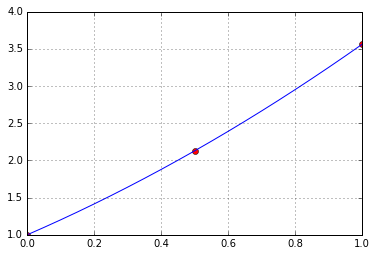

In [9]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xData = np.array([0., 0.5, 1.0])
f = lambda X:np.exp(X)+np.sin(X)
yData = f(X)


def evalPoly(a,xData,x):
    n = len(xData) - 1
    # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def coeffts(xData,yData):
    m = len(xData)
    # Number of data points
    a = yData.copy()

    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a


a = coeffts(xData,yData)


Xplot = np.linspace(xData[0], xData[-1], 21)
Yplot = []

for x in Xplot:
    Yplot.append(evalPoly(a,xData,x))

plt.plot(xData, yData, "ro", Xplot, Yplot, "-")
plt.grid()
plt.show()